In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import sklearn
import numpy as np
import umap
import openai
from dotenv import find_dotenv, load_dotenv
import re

In [2]:
#openai.api_key = 
load_dotenv(find_dotenv())

True

In [3]:
tqdm.pandas()

In [4]:
df = pd.read_csv('sample_twitter_prepared.csv')

In [5]:
df.iloc[2,1]

'i really hope you all change but im sure you wont because you dont have to'

In [6]:
client = openai.OpenAI()

In [31]:
### Embedding and Dimensionality Reduction

In [7]:
def embeddings(prompt):
    prompt = prompt
    response = client.embeddings.create(
        input=prompt,
        model="text-embedding-ada-002"
    )
    return response.data[0].embedding

In [ ]:
#df['embeddings'] = df['clean_text'].progress_apply(lambda x: embeddings(x))
#df.to_csv('sample_emb.csv', index=False)

In [8]:

df = pd.read_csv('sample_emb.csv')

In [9]:
df.head()

,tweet_id,clean_text,embeddings
0,119237,causing the reply to be disregarded and the ta...,"[-0.03649440407752991, -0.0002666840155143291,..."
1,119238,your business means a lot to us please dm your...,"[-0.02106456272304058, -0.012910759076476097, ..."
2,119239,i really hope you all change but im sure you w...,"[-0.004727767314761877, -0.007849877700209618,..."
3,119240,livechat is online at the moment or contact ...,"[-0.012544283643364906, -0.004000394605100155,..."
4,119241,see attached error message ive tried leaving a...,"[-0.04834394529461861, 0.010852991603314877, 0..."


In [11]:
# transform string to list
import ast
df['embeddings'] = df['embeddings'].apply(ast.literal_eval)

In [12]:
type(df.embeddings.loc[2])

list

In [13]:
reducer = umap.UMAP()
embedding_list = df['embeddings'].tolist()
embedding_matrix = np.stack(embedding_list, axis=0)
reduced_embeddings = reducer.fit_transform(embedding_matrix)

df['reduced_embeddings'] = list(reduced_embeddings)


In [14]:
df.head()

,tweet_id,clean_text,embeddings,reduced_embeddings
0,119237,causing the reply to be disregarded and the ta...,"[-0.03649440407752991, -0.0002666840155143291,...","[6.5672274, -1.7137535]"
1,119238,your business means a lot to us please dm your...,"[-0.02106456272304058, -0.012910759076476097, ...","[2.521764, -5.7987614]"
2,119239,i really hope you all change but im sure you w...,"[-0.004727767314761877, -0.007849877700209618,...","[3.3045926, -3.0133846]"
3,119240,livechat is online at the moment or contact ...,"[-0.012544283643364906, -0.004000394605100155,...","[3.0377257, -1.7177818]"
4,119241,see attached error message ive tried leaving a...,"[-0.04834394529461861, 0.010852991603314877, 0...","[3.2615876, -1.2835364]"


In [15]:
#df.to_csv('sample_emb_reduced.csv', index=False)

In [32]:
df.head()

,tweet_id,clean_text,embeddings,reduced_embeddings,cluster,class_name
0,119237,causing the reply to be disregarded and the ta...,"[-0.03649440407752991, -0.0002666840155143291,...","[6.5672274, -1.7137535]",1,iPhone iOS Problems
1,119238,your business means a lot to us please dm your...,"[-0.02106456272304058, -0.012910759076476097, ...","[2.521764, -5.7987614]",4,Customer Support Requests
2,119239,i really hope you all change but im sure you w...,"[-0.004727767314761877, -0.007849877700209618,...","[3.3045926, -3.0133846]",2,Service Issues
3,119240,livechat is online at the moment or contact ...,"[-0.012544283643364906, -0.004000394605100155,...","[3.0377257, -1.7177818]",2,Service Issues
4,119241,see attached error message ive tried leaving a...,"[-0.04834394529461861, 0.010852991603314877, 0...","[3.2615876, -1.2835364]",2,Service Issues


In [ ]:
### Choose the best n_clusters

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df['reduced_embeddings'].tolist()

n_clusters_range = range(3, 35)

silhouette_scores = []

# (n_clusters, silhouette_score, kmeans)
# starting with score 0 because negative values indicate terrible clusters
cluster_with_max_silhouette = (0, 0, None)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state = 1234)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg >= cluster_with_max_silhouette[1]:
        cluster_with_max_silhouette = (n_clusters, silhouette_avg, kmeans)


C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

In [18]:
cluster_with_max_silhouette

(6, 0.45921305, KMeans(n_clusters=6, random_state=1234))

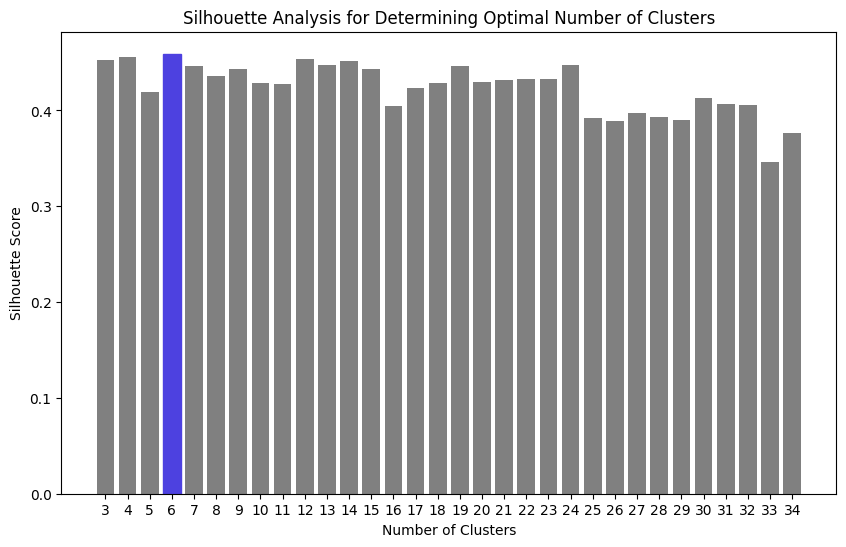

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bars = plt.bar(n_clusters_range, silhouette_scores, color='gray')

max_index = np.argmax(silhouette_scores)
bars[max_index].set_color('#4d41e0')

plt.xticks(n_clusters_range)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Determining Optimal Number of Clusters')

plt.show()

In [20]:
kmeans = cluster_with_max_silhouette[2]
cluster_labels = kmeans.predict(X)
df['cluster'] = cluster_labels

In [21]:
df.head()

,tweet_id,clean_text,embeddings,reduced_embeddings,cluster
0,119237,causing the reply to be disregarded and the ta...,"[-0.03649440407752991, -0.0002666840155143291,...","[7.010563, 9.0741825]",3
1,119238,your business means a lot to us please dm your...,"[-0.02106456272304058, -0.012910759076476097, ...","[9.493805, 12.820186]",2
2,119239,i really hope you all change but im sure you w...,"[-0.004727767314761877, -0.007849877700209618,...","[10.4806, 10.635169]",0
3,119240,livechat is online at the moment or contact ...,"[-0.012544283643364906, -0.004000394605100155,...","[10.666559, 8.606324]",5
4,119241,see attached error message ive tried leaving a...,"[-0.04834394529461861, 0.010852991603314877, 0...","[9.924731, 8.402227]",5


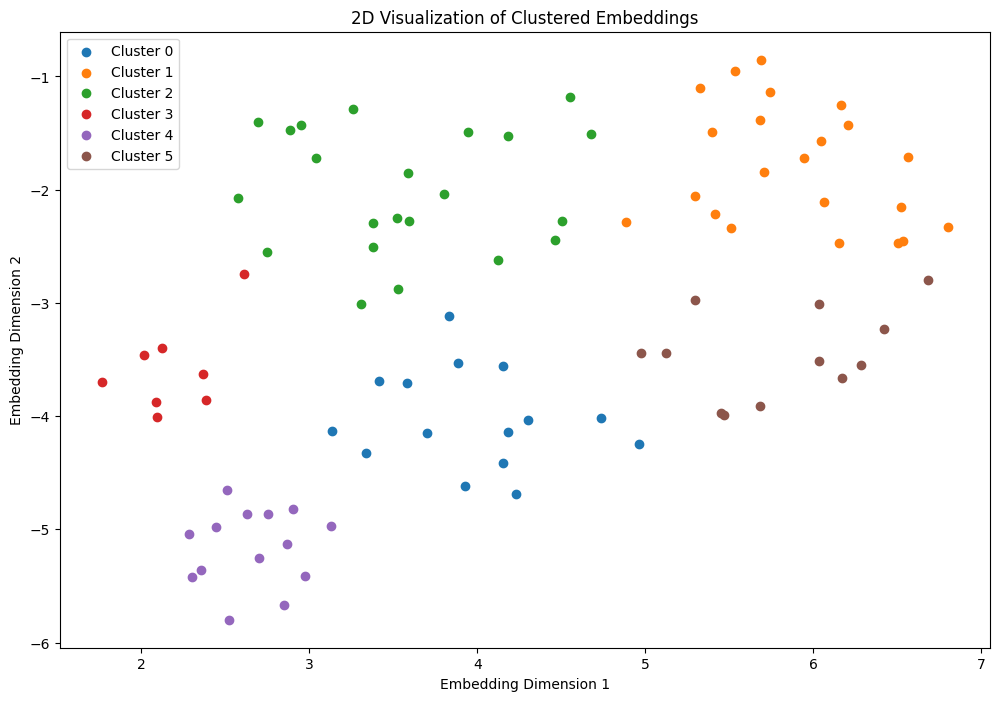

In [21]:
embeddings = np.stack(df['reduced_embeddings'].values)
clusters = df['cluster'].values

unique_clusters = set(clusters)

plt.figure(figsize=(12, 8))

for cluster_id in unique_clusters:
    cluster_indices = np.where(clusters == cluster_id)
    cluster_embeddings = embeddings[cluster_indices]

    x_coords = cluster_embeddings[:, 0]
    y_coords = cluster_embeddings[:, 1]
    plt.scatter(x_coords, y_coords, label=f"Cluster {cluster_id}")

plt.title("2D Visualization of Clustered Embeddings")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")

plt.legend()
plt.show()

In [ ]:
### Defining names for clusters

In [22]:
CLASSIFICATION_PROMPT = """
Given a list of questions and answers. Classify the topic of those questions and answers.

Return the response in the format:
Description: 2-3 sentences of the common theme among all entries.
Class name: A noun (1-3 words) that encompasses the description and can be used as the class name during classification."""

def classify_group(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages=[
          {"role": "system", "content": CLASSIFICATION_PROMPT},
          {"role": "user", "content": prompt},
      ],
        temperature=0.7
    )
    return response.choices[0].message.content

In [26]:
cluster_counts = df['cluster'].value_counts()
cluster_name = {}

for cluster in cluster_counts.index:
    cluster_content = df[df['cluster'] == cluster]['clean_text'].values[:30]
    prompt = '\n'.join([f"```{issue}```" for issue in cluster_content])
    cluster_class = classify_group(prompt)
    
    class_name_match = re.search(r'Class name: (.*)', cluster_class)
    
    if class_name_match:
        class_name = class_name_match.group(1).strip()
        cluster_name[cluster] = class_name
        print(f"Cluster {cluster}: {class_name} - finished")
    else:
        print(f"Cluster {cluster}: No 'Class name' found in the classification result")


Cluster 1: iPhone iOS Problems - finished
Cluster 2: Service Issues - finished
Cluster 0: Technical Support - finished
Cluster 4: Customer Support Requests - finished
Cluster 5: Spotify Playback Support - finished
Cluster 3: Age Verification Policies - finished


In [27]:
cluster_name

{1: 'iPhone iOS Problems',
 2: 'Service Issues',
 0: 'Technical Support',
 4: 'Customer Support Requests',
 5: 'Spotify Playback Support',
 3: 'Age Verification Policies'}

In [29]:
df['class_name'] = df['cluster'].map(cluster_name)

In [30]:
df.head()

,tweet_id,clean_text,embeddings,reduced_embeddings,cluster,class_name
0,119237,causing the reply to be disregarded and the ta...,"[-0.03649440407752991, -0.0002666840155143291,...","[6.5672274, -1.7137535]",1,iPhone iOS Problems
1,119238,your business means a lot to us please dm your...,"[-0.02106456272304058, -0.012910759076476097, ...","[2.521764, -5.7987614]",4,Customer Support Requests
2,119239,i really hope you all change but im sure you w...,"[-0.004727767314761877, -0.007849877700209618,...","[3.3045926, -3.0133846]",2,Service Issues
3,119240,livechat is online at the moment or contact ...,"[-0.012544283643364906, -0.004000394605100155,...","[3.0377257, -1.7177818]",2,Service Issues
4,119241,see attached error message ive tried leaving a...,"[-0.04834394529461861, 0.010852991603314877, 0...","[3.2615876, -1.2835364]",2,Service Issues


     ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/23.5 MB 1.7 MB/s eta 0:00:15
     ---------------------------------------- 0.2/23.5 MB 3.0 MB/s eta 0:00:08
     - -------------------------------------- 0.6/23.5 MB 3.8 MB/s eta 0:00:07
     -- ------------------------------------- 1.2/23.5 MB 6.4 MB/s eta 0:00:04
     --- ------------------------------------ 1.9/23.5 MB 7.6 MB/s eta 0:00:03
     ---- ----------------------------------- 2.6/23.5 MB 9.1 MB/s eta 0:00:03
     ----- ---------------------------------- 3.3/23.5 MB 10.0 MB/s eta 0:00:03
     ------ --------------------------------- 4.0/23.5 MB 10.2 MB/s eta 0:00:02
     -------- ------------------------------- 4.8/23.5 MB 10.6 MB/s eta 0:00:02
     --------- ------------------------------ 5.7/23.5 MB 11.7 MB/s eta 0:00:02
     ----------- ---------------------------- 6.5/23.5 MB 12.2 MB/s eta 0:00:02
     ------------ --------------------------- 7.3/23.5

[I 15:27:56 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 15:27:56 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 15:27:56 InstallContribNbextensionsApp] Installing C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 15:27:56 InstallContribNbextensionsApp] Making directory: C:\Users\skryp\AppData\Roaming\jupyter\nbextensions\addbefore\
[I 15:27:56 InstallContribNbextensionsApp] Copying: C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\addbefore.yaml -> C:\Users\skryp\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 15:27:56 InstallContribNbextensionsApp] Copying: C:\Users\skryp\AppData\Local\Programs\Python\Python310\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\icon.png -> C:\Users\s

Enabling notebook extension varInspector/main...
      - Validating: ok
Enabling notebook extension codefolding/main...
      - Validating: ok
